## **Scout Car EDA/Modeling**

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.regression import setup, compare_models, create_model, evaluate_model, tune_model, finalize_model, predict_model
# !pip3 install pycaret

import warnings
warnings.filterwarnings("ignore")

ImportError: cannot import name '_format_load_msg' from 'joblib.memory' (/home/oem/.local/lib/python3.8/site-packages/joblib/memory.py)

## Load Data

In [7]:
df_org = pd.read_csv('./data/cleaned_scout_car.csv')
df = df_org.copy()

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'registration',
       'prev_owner', 'hp', 'type', 'next_inspection', 'inspection_new',
       'warrantymonths', 'body_color', 'paint_type', 'body_color_original',
       'upholstery', 'nr_of_doors', 'nr_of_seats', 'model_code',
       'gearing_type', 'displacement', 'cylinders', 'weight', 'drive_chain',
       'fuel', 'co2_emissiong_co2km', 'emission_class', 'comfort_convenience',
       'entertainment_media', 'extras', 'safety_security', 'gears',
       'country_version', 'upholstery_material', 'upholstery_color',
       'consumption_combined', 'consumption_city', 'consumption_country'],
      dtype='object')

## Fill NaN with np.nan

In [21]:
df.fillna(np.nan,inplace=True)

## Change Data Types of Categorical and Quantitive Columns

In [25]:
df['gears'].value_counts(dropna=False)

6.0     5822
NaN     4712
5.0     3239
7.0     1908
8.0      224
9.0        6
1.0        2
3.0        2
4.0        2
2.0        1
50.0       1
Name: gears, dtype: int64

In [27]:
cols_cat = ['make_model', 'body_type', 'vat', 'registration', 'prev_owner', 
            'type', 'next_inspection', 'inspection_new', 'body_color', 'paint_type', 
            'body_color_original', 'upholstery', 'model_code', 'gearing_type', 'drive_chain',
            'fuel', 'co2_emissiong_co2km', 'emission_class', 'comfort_convenience', 'entertainment_media', 
            'extras', 'safety_security', 'gears', 'country_version', 'upholstery_material', 
            'upholstery_color', 'consumption_combined', 'consumption_city', 'consumption_country']
cols_quant = ['price', 'km', 'hp', 'displacement', 'warrantymonths', 
              'weight', 'nr_of_doors', 'nr_of_seats', 'cylinders']

# lower strings and change ' ' to '_'
for col in cols_cat:
    df[col] = df[col].astype(str)
    df[col] = df[col].str.lower().str.replace(' ', '_')

# assign column types
df[cols_cat] = df[cols_cat].astype('category')
df[cols_quant] = df[cols_quant].apply(pd.to_numeric, errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   make_model            15919 non-null  category
 1   body_type             15919 non-null  category
 2   price                 15919 non-null  int64   
 3   vat                   15919 non-null  category
 4   km                    14895 non-null  float64 
 5   registration          15919 non-null  category
 6   prev_owner            15919 non-null  category
 7   hp                    15831 non-null  float64 
 8   type                  15919 non-null  category
 9   next_inspection       15919 non-null  category
 10  inspection_new        15919 non-null  category
 11  warrantymonths        4853 non-null   float64 
 12  body_color            15919 non-null  category
 13  paint_type            15919 non-null  category
 14  body_color_original   15919 non-null  category
 15  up

## Make Plots of Categorical Variables

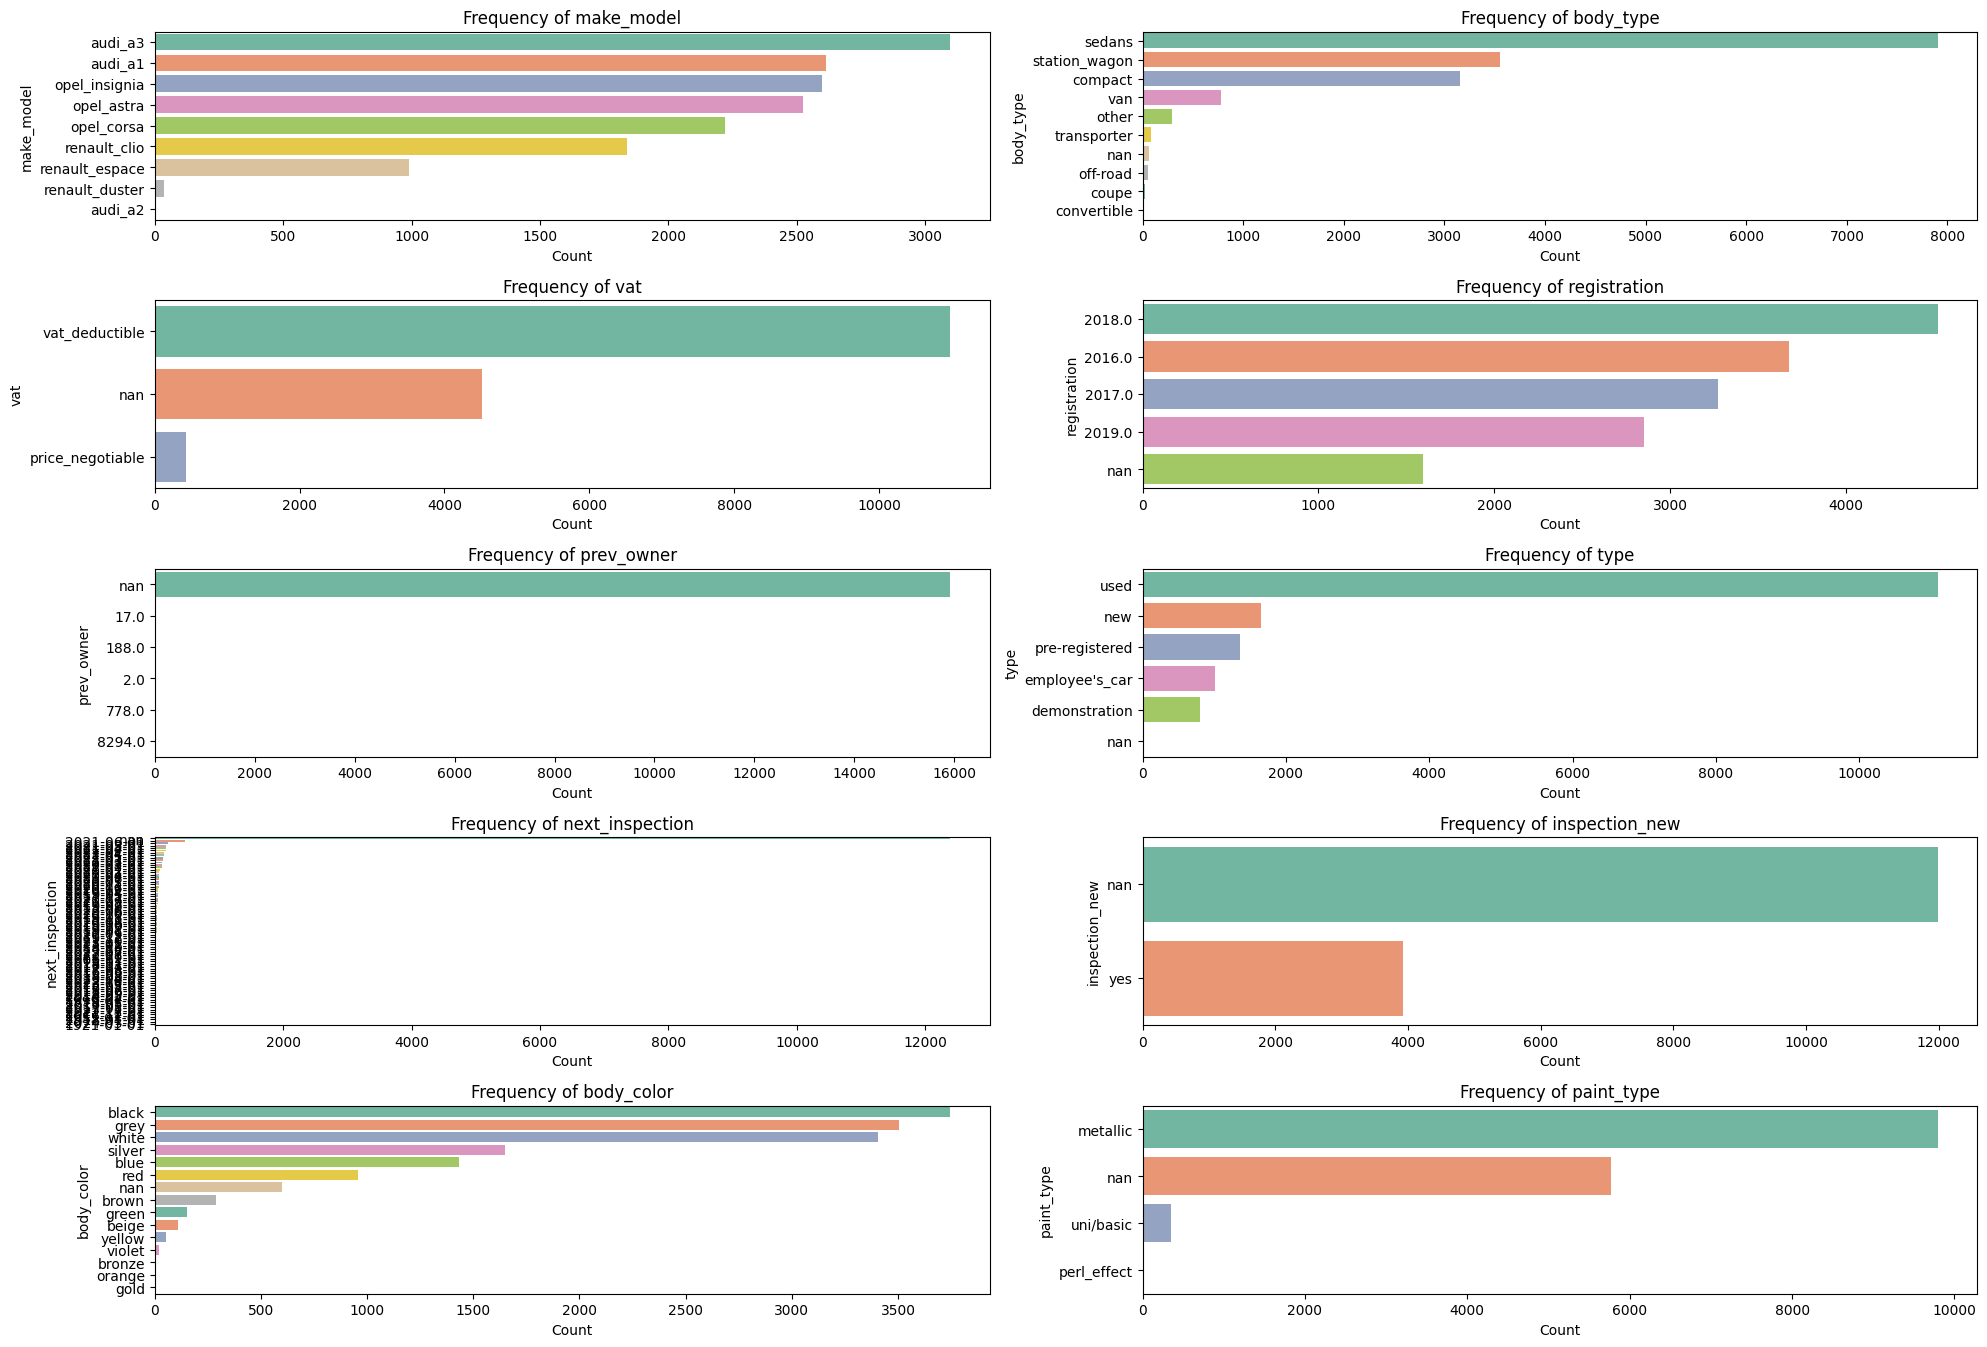

In [45]:
# Assuming 'df' is your DataFrame and 'cols_cat' is defined as given
cols_cat = ['make_model', 'body_type', 'vat', 'registration', 'prev_owner', 
            'type', 'next_inspection', 'inspection_new', 'body_color', 'paint_type', 
            'body_color_original', 'upholstery', 'model_code', 'gearing_type', 'drive_chain',
            'fuel', 'co2_emissiong_co2km', 'emission_class', 'comfort_convenience', 'entertainment_media', 
            'extras', 'safety_security', 'gears', 'country_version', 'upholstery_material', 
            'upholstery_color', 'consumption_combined', 'consumption_city', 'consumption_country']

# Calculate the number of rows and columns needed for the subplots grid
n_cols = 2  # You can adjust this based on how many plots you want per row
n_rows = -(-len(cols_cat) // n_cols)  # Ceiling division to get the number of rows

# Set up the figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 40))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Loop over the categorical columns and create a bar plot for each
for i, col in enumerate(cols_cat[:10]):
    sns.countplot(y=df[col], ax=axes[i], palette="Set2", order=df[col].value_counts(dropna=False).index)
    axes[i].set_title(f'Frequency of {col}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(col)

# Remove any empty subplots if the number of columns isn't a perfect grid
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

## Make Historgrams of Numerical Variables

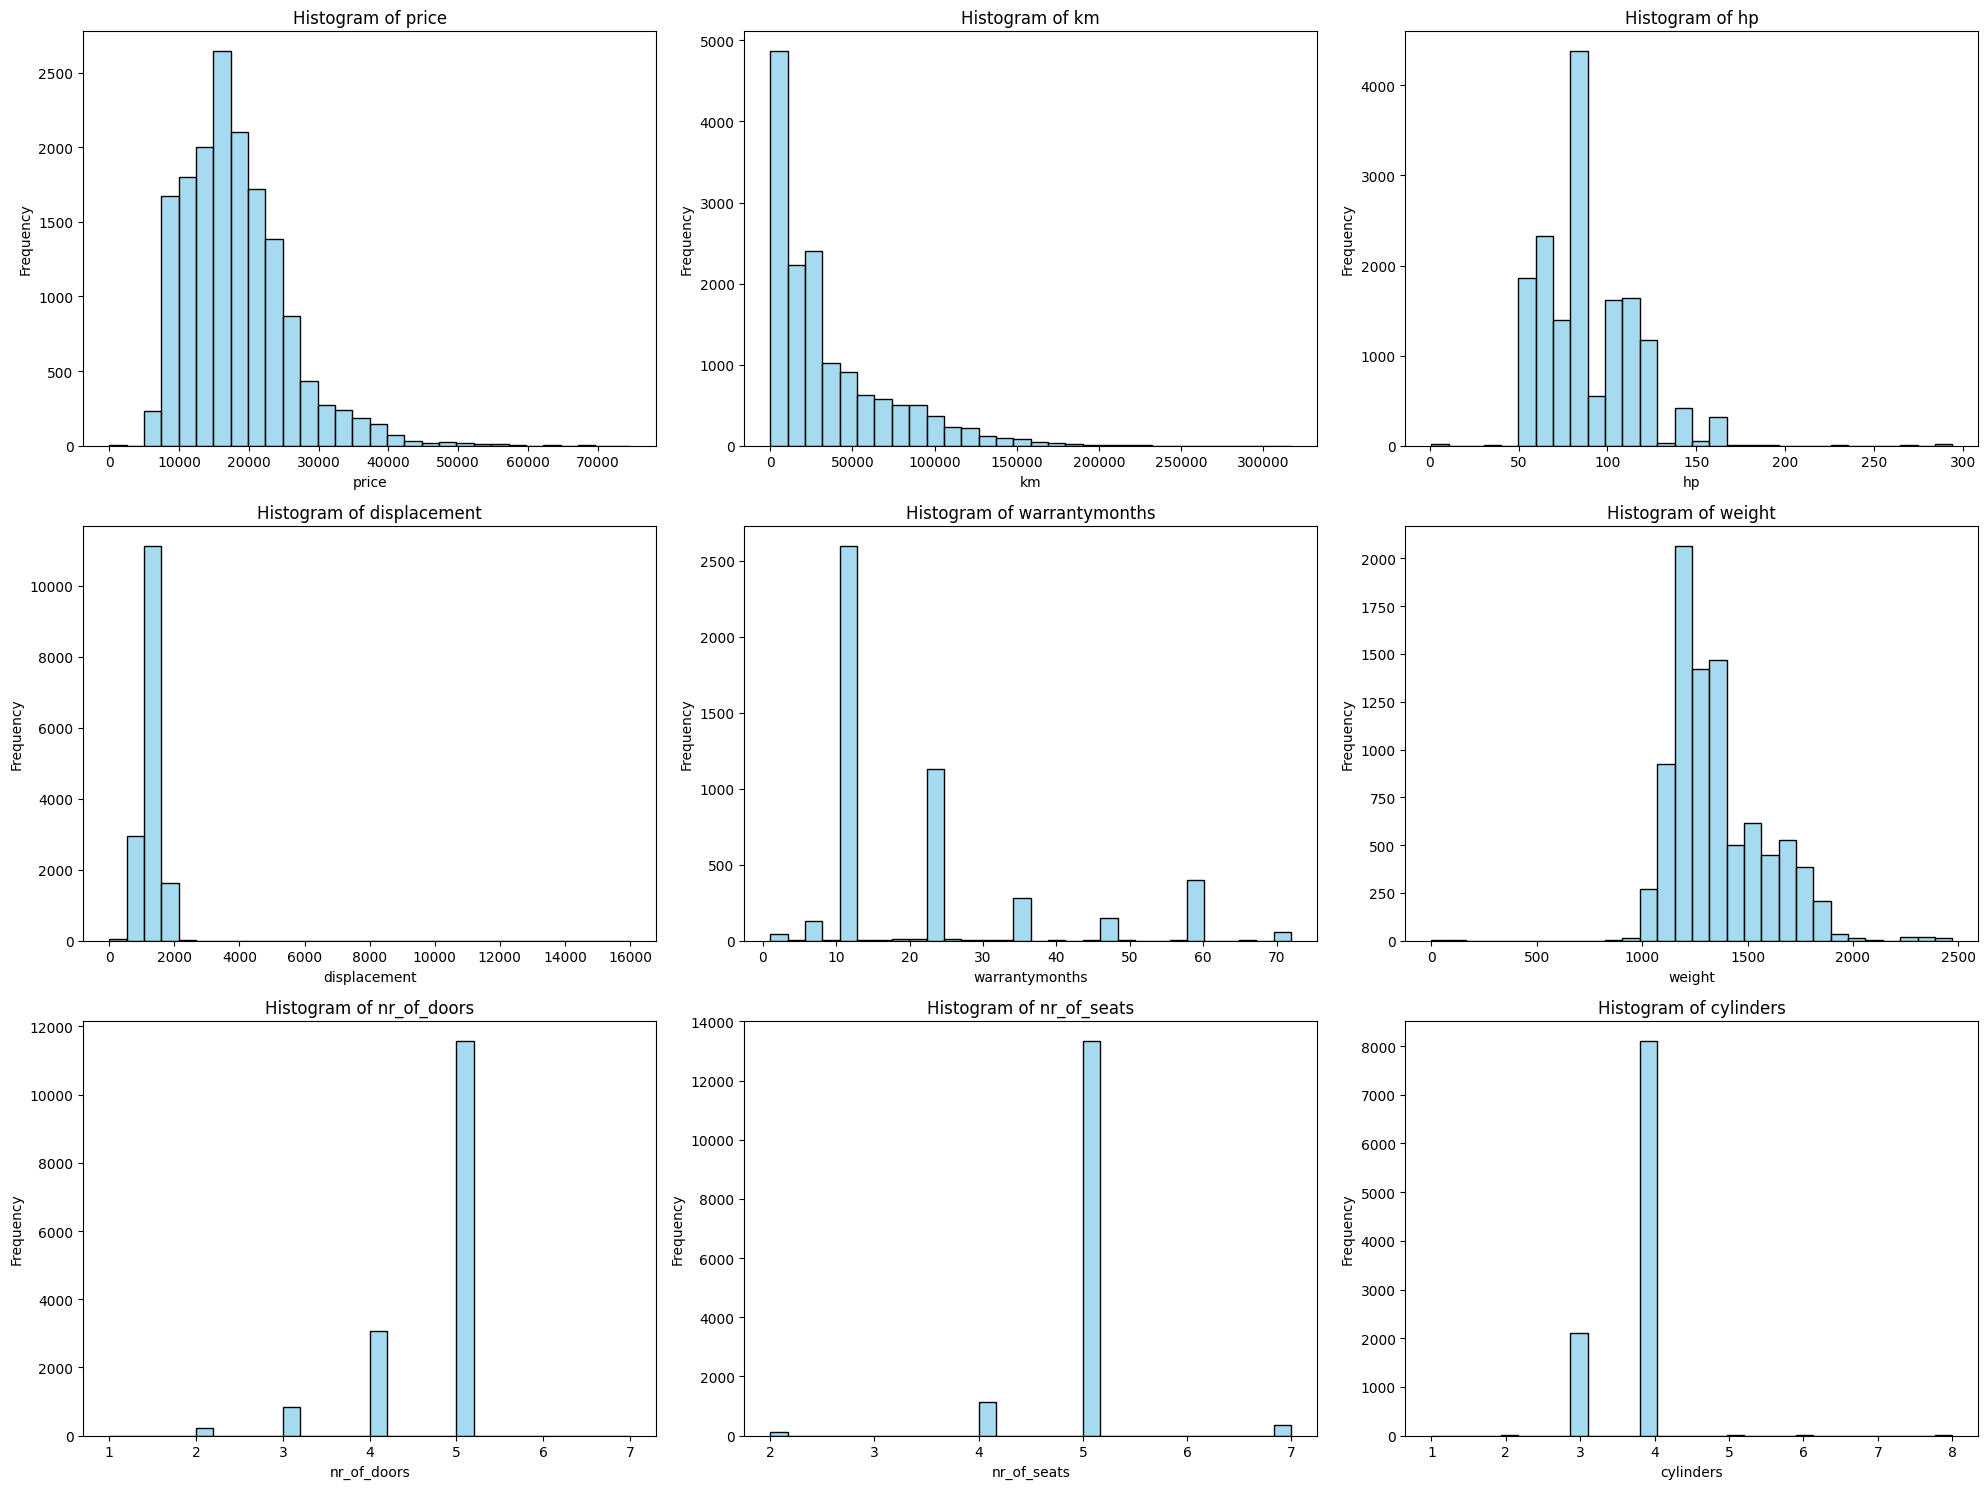

In [34]:
# List of numerical columns
cols_quant = ['price', 'km', 'hp', 'displacement', 'warrantymonths', 
              'weight', 'nr_of_doors', 'nr_of_seats', 'cylinders']

# Calculate the number of rows and columns needed for the subplots grid
n_cols = 3  # Number of plots per row
n_rows = -(-len(cols_quant) // n_cols)  # Ceiling division to get the number of rows

# Set up the figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Loop over the numerical columns and create a histogram for each
for i, col in enumerate(cols_quant):
    sns.histplot(df[col], bins=30, ax=axes[i], kde=False, color='skyblue')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots if the number of columns isn't a perfect grid
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

## PyCaret to identify best regression model

In [47]:
# # Load your DataFrame (replace this with your actual data loading code)
# df = pd.read_csv('your_data.csv')

# # Convert categorical columns to 'category' dtype
# categorical_columns = ['make_model', 'body_type', 'vat', 'registration', 'prev_owner', 'type', 
#                         'next_inspection', 'inspection_new', 'body_color', 'paint_type', 
#                         'body_color_original', 'upholstery', 'model_code', 'gearing_type', 
#                         'drive_chain', 'fuel', 'co2_emissiong_co2km', 'emission_class', 
#                         'comfort_convenience', 'entertainment_media', 'extras', 
#                         'safety_security', 'gears', 'country_version', 'upholstery_material', 
#                         'upholstery_color', 'consumption_combined', 'consumption_city', 
#                         'consumption_country']

# for col in categorical_columns:
#     df[col] = df[col].astype('category')

# Handle missing values (you might choose a different strategy)
df.fillna(df.median(), inplace=True)

# Initialize the PyCaret setup
regression_setup = setup(data=df, target='price', session_id=123)

# Compare different regression models
best_model = compare_models()

# Create a specific model (e.g., Random Forest Regressor)
rf_model = create_model('rf')

# Evaluate the model
evaluate_model(rf_model)

# Tune the model
tuned_rf_model = tune_model(rf_model)

# Finalize the model
final_model = finalize_model(tuned_rf_model)

# Make predictions on new data (replace 'new_data' with your actual new data DataFrame)
# predictions = predict_model(final_model, data=new_data)


NameError: name 'setup' is not defined